In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, matthews_corrcoef, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import tree

In [14]:
data = pd.read_csv("threats.csv")

In [15]:
X = data.drop('Threat', axis=1)
y = data['Threat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [18]:
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [19]:
print(f'AUC: {auc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Recall: {recall:.4f}')

AUC: 0.4988
F1 Score: 0.0000
Matthews Correlation Coefficient: -0.0021
Recall: 0.0000


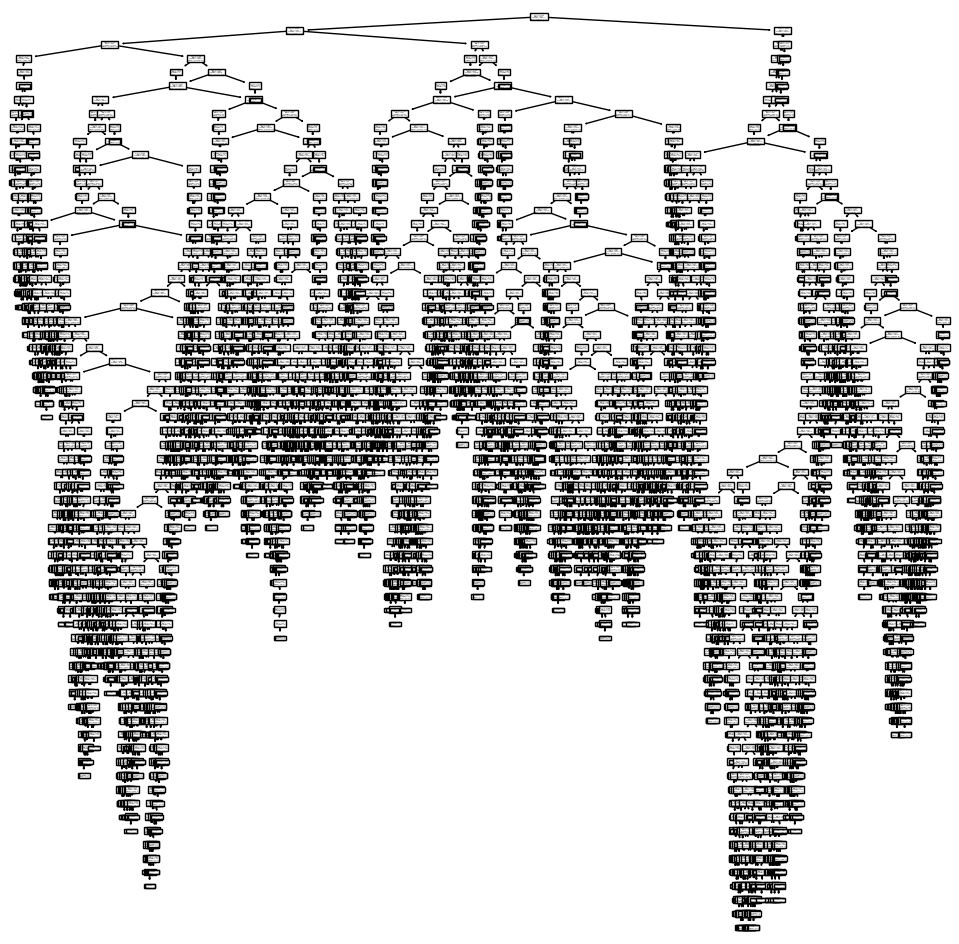

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, ax=ax)
plt.show()